In [3]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
raw_data=pd.read_csv('/content/drive/My Drive/BTECH SEM 5/ECSE381l-DeepLearning/Lab4/DL_lab_data_quote.csv')

In [5]:
raw_data.head()

,index,Sentence,Class
0,1,Celebrate Your Small Wins,1
1,2,All our dreams can come true,1
2,3,Things work out best for those who make the be...,1
3,4,unleash hatred and terror,0
4,5,Unhappy people are rich,0


In [6]:
raw_data=raw_data.drop(['index'],axis=1)

In [7]:
def create_freq_mat(data_frame):
  freq_mat=[]
  for item in data_frame:
    if item not in stop:
      freq_mat.append(item)
      
  return freq_mat

In [8]:
freq_mat=create_freq_mat(raw_data['Sentence'].str.lower().str.split())

In [9]:
raw_data['Sentence']=raw_data['Sentence'].str.lower().str.split()

In [10]:
raw_data['Freq_words']=raw_data['Sentence'].apply(lambda x: [item for item in x if item not in stop])

In [11]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
nltk.download('wordnet')
w_tokenizer = WhitespaceTokenizer()

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
lemma=[]
for i in raw_data['Freq_words']:
  dump_lemma=[]
  for j in i:
    dump_lemma.append(lemmatizer.lemmatize(j))
  lemma.append(dump_lemma)
    

In [13]:
raw_data['Lemma']=lemma

In [14]:
for i in range(len(raw_data['Lemma'])):
  raw_data['Lemma'][i] = ' '.join(map(str, raw_data['Lemma'][i])) 
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
X=raw_data['Lemma'].values

In [16]:
X=X.tolist()

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = CountVectorizer()
X=count_vectorizer.fit_transform(X).toarray()



In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,raw_data['Class'].values,random_state=42,test_size=0.30)

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 368       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________
Model With  8 Nodes: 
Training Accuracy: 0.8750
Testing Accuracy:  0.5000


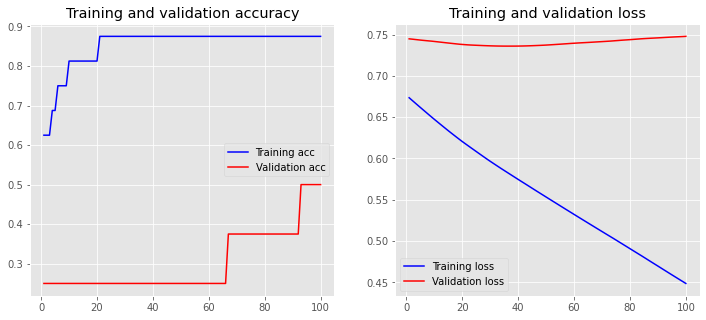

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                736       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________
Model With  16 Nodes: 
Training Accuracy: 1.0000
Testing Accuracy:  0.3750


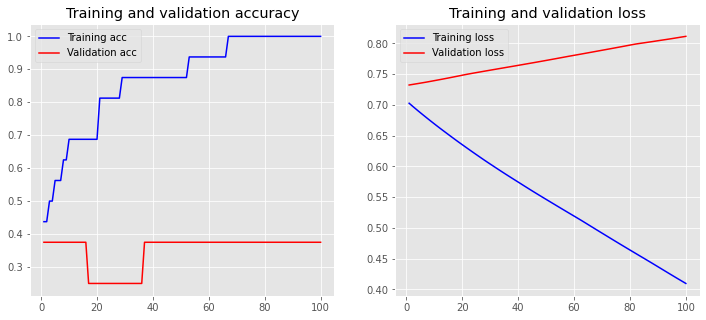

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                1472      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________
Model With  32 Nodes: 
Training Accuracy: 1.0000
Testing Accuracy:  0.5000


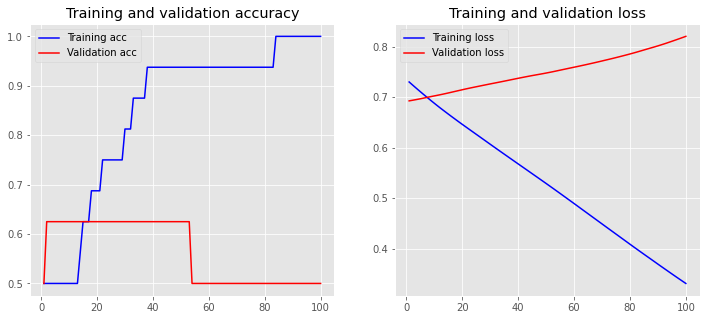

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                2944      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________
Model With  64 Nodes: 
Training Accuracy: 1.0000
Testing Accuracy:  0.5000


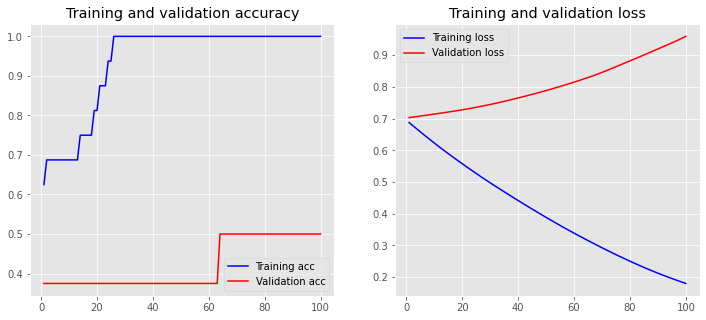

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               5888      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 6,017
Trainable params: 6,017
Non-trainable params: 0
_________________________________________________________________
Model With  128 Nodes: 
Training Accuracy: 1.0000
Testing Accuracy:  0.5000


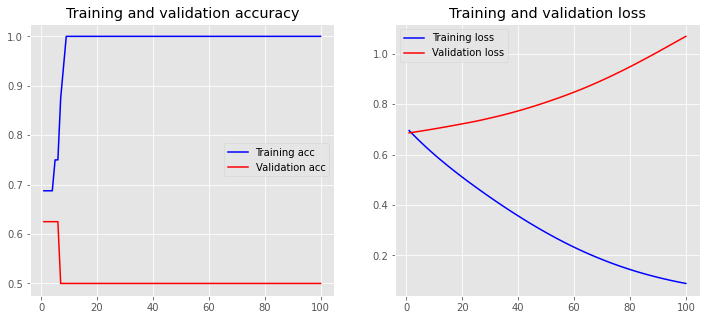

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               11776     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________
Model With  256 Nodes: 
Training Accuracy: 1.0000
Testing Accuracy:  0.5000


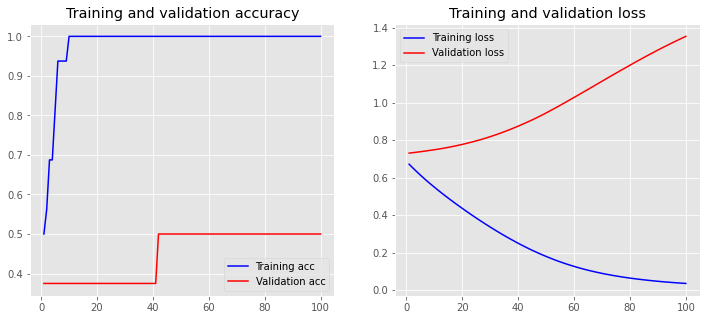

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               23552     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 513       
Total params: 24,065
Trainable params: 24,065
Non-trainable params: 0
_________________________________________________________________
Model With  512 Nodes: 
Training Accuracy: 1.0000
Testing Accuracy:  0.7500


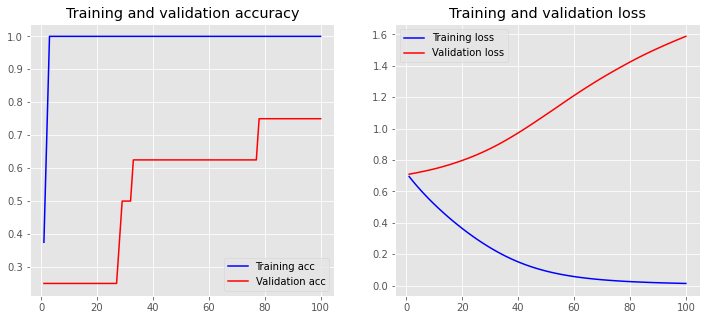

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1028)              47288     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 1029      
Total params: 48,317
Trainable params: 48,317
Non-trainable params: 0
_________________________________________________________________
Model With  1028 Nodes: 
Training Accuracy: 1.0000
Testing Accuracy:  0.7500


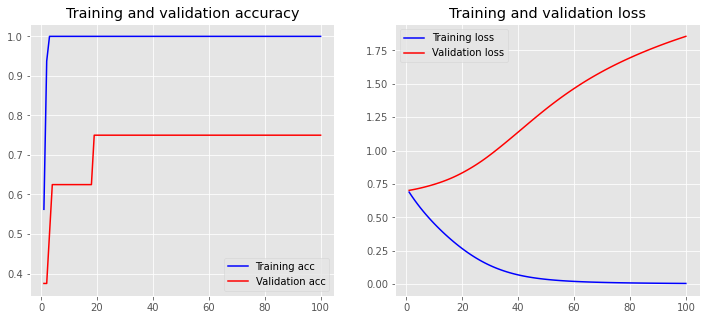

In [20]:
from keras.models import Sequential
from keras import layers
node_val=[8, 16, 32, 64, 128, 256, 512 ,1028]
for node in node_val:
  model = Sequential()
  model.add(layers.Dense(node, input_dim=X_train.shape[1], activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  history=model.fit(X_train,y_train,epochs=100,batch_size=20,verbose=0,validation_data=(X_test, y_test))
  print('Model With ',node,'Nodes: ')
  loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
  print("Training Accuracy: {:.4f}".format(accuracy))
  loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
  print("Testing Accuracy:  {:.4f}".format(accuracy))
  plot_history(history)
  plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                1472      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________
Model With  1028 Nodes: 
Training Accuracy: 1.0000
Testing Accuracy:  0.5000


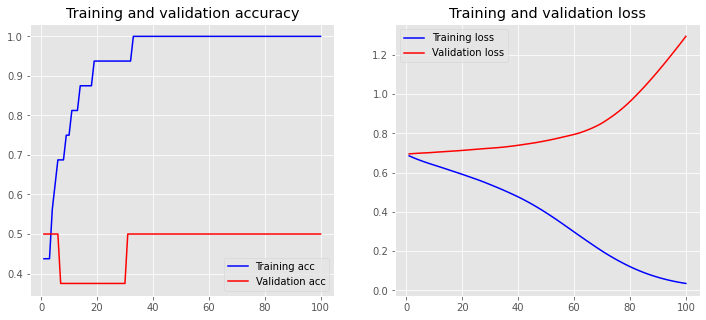

In [21]:
model = Sequential()
model.add(layers.Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
history=model.fit(X_train,y_train,epochs=100,batch_size=20,verbose=0,validation_data=(X_test, y_test))
print('Model With ',node,'Nodes: ')
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)
plt.show()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                1472      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 5,729
Trainable params: 5,729
Non-trainable params: 0
____________________________________________________

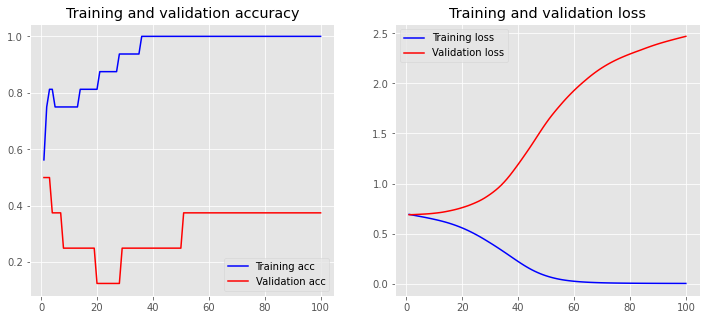

In [22]:
model = Sequential()
model.add(layers.Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
history=model.fit(X_train,y_train,epochs=100,batch_size=20,verbose=0,validation_data=(X_test, y_test))
print('Model With ',node,'Nodes: ')
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)
plt.show()

# Results

As we can see, the model clearly overfits. The model with a single layer having 8 nodes seems to perform the best as it is small and overfitting seems to have started.

As the number of nodes increases, training accuracy approaches 1 and validation accuracy decreases. This is a clear case of overfitting. 
